In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from env import user, password, host
import os
from acquire import wrangle_store_data
import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

Using OPS data (hint: if you don't know how to acquire this data, do a bit of google searching on how to do this with pandas):

Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv

In [2]:
def get_opsd_data():
    if os.path.exists('opsd.csv'):
        return pd.read_csv('opsd.csv')
    df = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')
    df.to_csv('opsd.csv', index=False)
    return df


In [3]:
df=get_opsd_data()

In [4]:
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


# 1. Convert date column to datetime format.

In [6]:
def convert_datetime():
    df.Date = pd.to_datetime(df.Date)

In [7]:
convert_datetime()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 171.3 KB


In [9]:
df.isnull().sum() # number null values in each column

Date              0
Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

# 2. Plot the distribution of each of your variables.

Column: Date


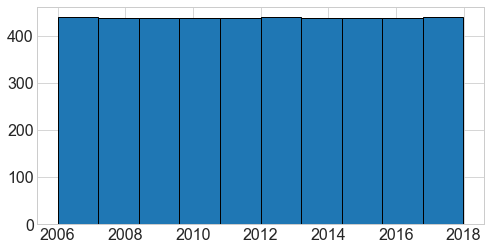

Column: Consumption


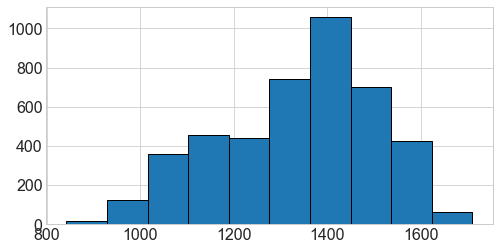

Column: Wind


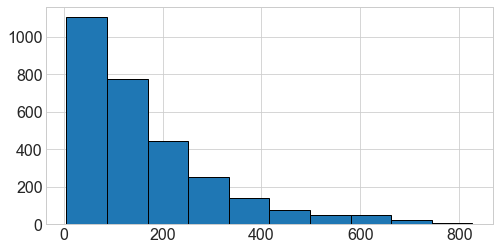

Column: Solar


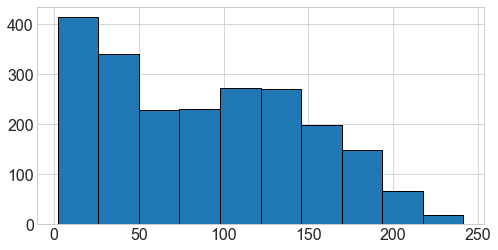

Column: Wind+Solar


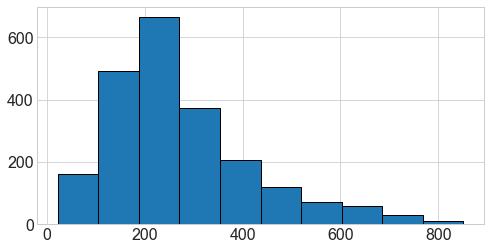

In [10]:
# Univariate analysis of variable distributions
for col in df.columns:
    print('Column: ' + col)
    plt.figure(figsize=(8,4))
    plt.hist(df[col], edgecolor='black')
    plt.show()

In [11]:
def plot_univariate():
    # Univariate analysis of variable distributions
    for col in df.columns:
        print('Column: ' + col)
        plt.figure(figsize=(8,4))
        plt.hist(df[col], edgecolor='black')
        plt.show()

# 3. Set the index to be the datetime variable.

In [12]:
# Set the index as that date and then sort index (by the date)
df = df.set_index("Date").sort_index()

In [13]:
df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


# 4. Add a month and a year column to your dataframe.

In [14]:
df['month'] = df.index.month

df['year'] = df.index.year

df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


# 5. Fill any missing values.

In [15]:
print('Number of rows:', df.index.nunique())
# timedeltabecause subtraction of a date range will be one less
n_days = df.index.max() - df.index.min() + pd.Timedelta('1d')
print(f"Number of days between first and last day:", n_days)

Number of rows: 4383
Number of days between first and last day: 4383 days 00:00:00


In [16]:
df.isnull().sum() # number null values in each column

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [17]:
df.Wind.unique() # unique values of wind

array([    nan,  48.709,  24.628, ..., 584.277, 721.247, 721.176])

In [18]:
df.Wind.nunique() # unique values of wind

2913

In [19]:
df.describe()

,Consumption,Wind,Solar,Wind+Solar,month,year
count,4383.000000,2920.000000,2188.000000,2187.000000,4383.000000,4383.000000
mean,1338.675836,164.814173,89.258695,272.663481,6.522930,2011.500342
std,165.775710,143.692732,58.550099,146.319884,3.449097,3.452347
min,842.395000,5.757000,1.968000,21.478000,1.000000,2006.000000
25%,1217.859000,62.353250,35.179250,172.185500,4.000000,2008.500000
50%,1367.123000,119.098000,86.407000,240.991000,7.000000,2012.000000
75%,1457.761000,217.900250,135.071500,338.988000,10.000000,2014.500000
max,1709.568000,826.278000,241.580000,851.556000,12.000000,2017.000000


In [20]:
for col in list(df.columns):
    print(df[col].isna().sum())

0
1463
2195
2196
0
0


In [21]:
df.fillna(df.mean(numeric_only=True).round(1), inplace=True)

In [23]:
df.Wind.fillna(0, inplace=True)

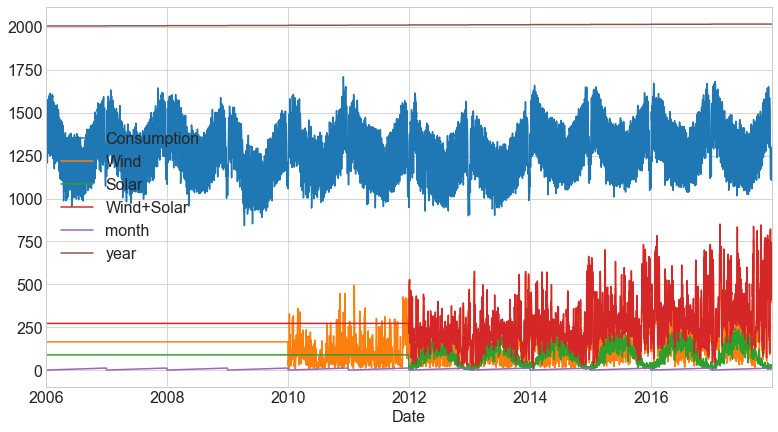

In [24]:
df['Wind+Solar'] = df.plot()

In [25]:
df.head()

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,164.8,89.3,"AxesSubplot(0.125,0.125;0.775x0.755)",1,2006
2006-01-02,1380.521,164.8,89.3,"AxesSubplot(0.125,0.125;0.775x0.755)",1,2006
2006-01-03,1442.533,164.8,89.3,"AxesSubplot(0.125,0.125;0.775x0.755)",1,2006
2006-01-04,1457.217,164.8,89.3,"AxesSubplot(0.125,0.125;0.775x0.755)",1,2006
2006-01-05,1477.131,164.8,89.3,"AxesSubplot(0.125,0.125;0.775x0.755)",1,2006


Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [26]:
def prep_ops_data(df):
    # Reassign the sale_date column to be a datetime type
    df.Date = pd.to_datetime(df.Date)

    # Sort rows by the date and then set the index as that date
    df = df.set_index("Date").sort_index()
    return df

<AxesSubplot:xlabel='Date'>

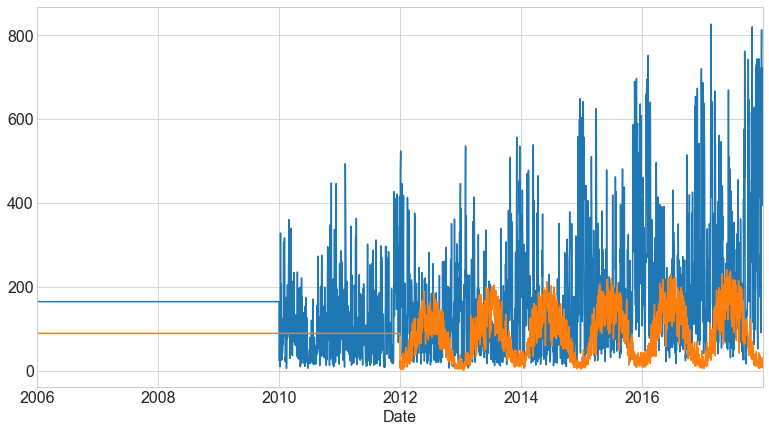

In [27]:
df.Wind.plot()
df.Solar.plot()